# Importing moludes

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
#loading the dataset
data = pd.read_csv('Algo8 Usecase/sample_data_intw.csv')

In [148]:
print(data.shape)
data.head()

(209593, 37)


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [149]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [150]:
data['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [151]:
per0 = (26162/209593)*100
per1 = (183431/209593)*100
print("percentage of label 0: ",per0)
print("percentage of label 1: ",per1)

percentage of label 0:  12.482287099282896
percentage of label 1:  87.5177129007171


In [152]:
#check missing(nan) values in the dataset
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

No missing values are there.

In [153]:
#Let's see what different type of data is present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
Unnamed: 0              209593 non-null int64
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-nul

In [154]:
#The column "Unnamed: 0" and "msisdn" have no significance, so drop it
data.drop(["Unnamed: 0", "msisdn"], inplace=True, axis=1)


In [155]:
data.shape

(209593, 35)

In [156]:
data.head(3)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10
2,1,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-08-19


Now let's find the correlation matrix so that we can easly find out 
which feature are contributting in final output and which are not.

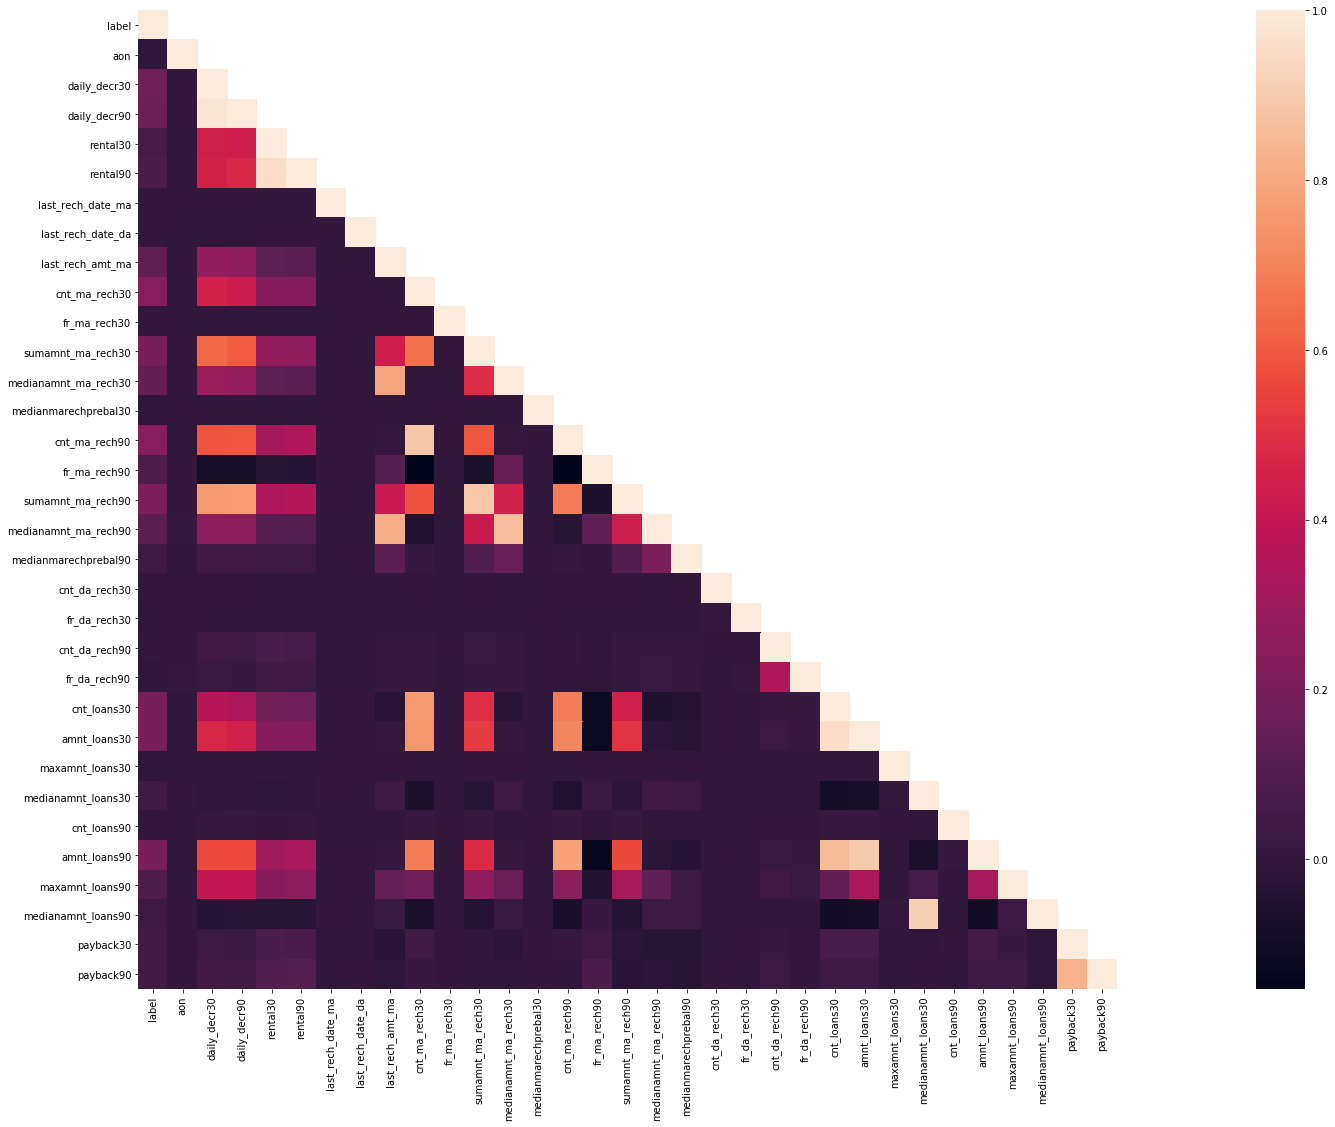

In [157]:
#corelation matrix.
cor_mat= data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(50,18)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=False,cbar=True)

In [158]:
correlations_data = data.corr()['label'].sort_values()
print(correlations_data)

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma_rech90       0.205793
cnt_ma_rec

In [159]:
# # # Feature Engineering and Selection

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between loss
    y = x['label']
    x = x.drop(columns = ['label'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['label'] = y
               
    return (x,drops)

In [160]:
(data_copy,drops)=remove_collinear_features(data,0.6)

In [161]:
data_copy.shape

(209593, 26)

In [162]:
drops

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans30',
 'cnt_ma_rech90',
 'medianamnt_loans90',
 'medianamnt_ma_rech30',
 'medianamnt_ma_rech90',
 'sumamnt_ma_rech30',
 'sumamnt_ma_rech90'}

In [163]:
data_copy.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'medianmarechprebal30', 'fr_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'maxamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate', 'label'],
      dtype='object')

In [164]:
data_copy['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [165]:
data_copy['pdate'].value_counts()

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
2016-07-06    3041
2016-06-15    3033
2016-07-11    3020
2016-07-10    3014
2016-06-27    2999
2016-06-18    2972
2016-06-23    2964
2016-07-12    2962
2016-06-25    2956
2016-07-01    2954
2016-07-13    2953
2016-06-14    2945
2016-06-12    2936
2016-07-18    2926
2016-07-09    2922
2016-07-14    2920
2016-06-11    2915
2016-07-02    2910
2016-07-15    2908
2016-06-22    2906
2016-07-03    2905
2016-06-26    2901
2016-06-13    2897
2016-07-19    2892
2016-07-08    2891
              ... 
2016-08-04    2445
2016-08-08    2428
2016-08-07    2408
2016-08-06    2358
2016-08-02    2352
2016-08-01    2335
2016-07-24    2318
2016-07-25    2313
2016-07-30    2307
2016-08-05    2298
2016-07-27    2284
2016-07-26    2273
2016-07-29    2245
2016-07-28    2233
2016-08-03    2213
2016-08-09    2191
2016-07-31    2178
2016-08-10    2178
2016-08-11    2157
2016-08-12    2130
2016-08-13    2119
2016-08-14  

In [166]:
#Drop the pcircle and pdate 
data_copy.drop(["pcircle", "pdate"], inplace=True, axis=1)

In [167]:
data_copy.shape

(209593, 24)

In [168]:
data_copy.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,payback90,label
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,0.0,0,0,6.0,0.0,2.0,6,29.000000,29.000000,0
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,0.0,0,0,12.0,0.0,1.0,12,0.000000,0.000000,1
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,0.0,0,0,6.0,0.0,1.0,6,0.000000,0.000000,1
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,0.0,0,0,6.0,0.0,2.0,6,0.000000,0.000000,1
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,0.0,0,0,6.0,0.0,7.0,6,2.333333,2.333333,1


In [169]:
labels = data_copy['label']
training_data = data_copy.drop('label',axis=1)

In [170]:
print(training_data.shape)
print(labels.shape)

(209593, 23)
(209593,)


In [173]:
#split the dataset into train and test set
X_train,X_test,Y_train,Y_test = train_test_split(training_data, labels, test_size=0.2, random_state=42)

In [175]:
#Feature scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

/home/vs/anaconda3/envs/sagacito/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vs/anaconda3/envs/sagacito/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/vs/anaconda3/envs/sagacito/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vs/anaconda3/envs/sagacito/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [176]:
Y_train = np.array(Y_train).reshape((-1, ))
Y_test = np.array(Y_test).reshape((-1, ))

In [177]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(167674, 23)
(41919, 23)
(167674,)
(41919,)


# Training LogisticRegression model

In [178]:
lr_model=LogisticRegression()
lr_model.fit(X_train, Y_train)
pred_label_lr = lr_model.predict(X_test)

print( "Train Accuracy :: ", accuracy_score(Y_train, lr_model.predict(X_train)))
print( "Test Accuracy  :: ", accuracy_score(Y_test, pred_label_lr))


/home/vs/anaconda3/envs/sagacito/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy ::  0.8765879027159846
Test Accuracy  ::  0.874973162527732


In [179]:
#classification report of logistic regression
print(classification_report(Y_test, pred_label_lr, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.64      0.02      0.05      5297
           1       0.88      1.00      0.93     36622

   micro avg       0.87      0.87      0.87     41919
   macro avg       0.76      0.51      0.49     41919
weighted avg       0.85      0.87      0.82     41919



# Training Random Forest model

In [180]:
RF_model=RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
RF_model.fit(X_train, Y_train)
pred_label_rf = RF_model.predict(X_test)

print( "Train Accuracy :: ", accuracy_score(Y_train, RF_model.predict(X_train)))
print( "Test Accuracy  :: ", accuracy_score(Y_test, pred_label_rf))


Train Accuracy ::  0.9946085857079809
Test Accuracy  ::  0.8758558171712112


In [181]:
#classification report
print(classification_report(Y_test, pred_label_rf, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.53      0.14      0.22      5297
           1       0.89      0.98      0.93     36622

   micro avg       0.88      0.88      0.88     41919
   macro avg       0.71      0.56      0.57     41919
weighted avg       0.84      0.88      0.84     41919

